In [1]:
spark.version

'3.1.3'

In [2]:
spark = SparkSession.builder.getOrCreate()
spark.conf.set("spark.sql.repl.eagerEval.enabled",True)

In [3]:
from pyspark.sql.functions import *
from pyspark.sql.types import *

from pyspark.sql import SQLContext
sqlContext = SQLContext(sc)

In [4]:
bucket_write = 'msca-bdp-students-bucket'

In [5]:
education_influence3 = spark.read.parquet('gs://' + bucket_write + '/shared_data/paraut/tweets/')

22/12/07 19:27:29 WARN org.apache.spark.sql.catalyst.util.package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


In [ ]:
from pyspark.sql import DataFrameStatFunctions as statFunc
statFunc(joined_df7).approxQuantile("avg_influence", [0.5], 0)

[0.2017167381974249]

In [6]:
top_50 = education_influence3.filter(education_influence3.avg_influence >= 0.2017167381974249)

In [7]:
news = top_50.select(['user_id', 'user_name', 'Organization', 'avg_influence', 'verified_user'])

In [8]:
news2 = news.dropDuplicates(['user_id'])

In [32]:
news3 = news2.filter(news.Organization == 'News')

In [ ]:
news3.orderBy('avg_influence', ascending = False).show(20, truncate = False)

+----------+---------------------+------------+------------------+-------------+
|user_id   |user_name            |Organization|avg_influence     |verified_user|
+----------+---------------------+------------+------------------+-------------+
|38647512  |The Indian Express   |News        |438.26468990779335|true         |
|1073676020|IndiaTodayFLASH      |News        |286.0008658008658 |true         |
|36327407  |Hindustan Times      |News        |233.49999999999997|true         |
|14416109  |Alexander            |News        |229.20885018848205|true         |
|15448383  |Inquirer             |News        |227.6366666666667 |true         |
|25088746  |SABC News            |News        |159.14573593073592|true         |
|422854795 |Brian Linder         |News        |157.82399604090762|true         |
|91966685  |Joy 99.7 FM          |News        |153.12620431047895|true         |
|37034483  |NDTV                 |News        |152.62833909392285|true         |
|3018960919|Rebel News      

In [9]:
school = news2.filter(news.Organization == 'School')

In [10]:
school.orderBy('avg_influence', ascending = False).show(20, truncate = False)

+------------------+--------------------------------------+------------+------------------+-------------+
|user_id           |user_name                             |Organization|avg_influence     |verified_user|
+------------------+--------------------------------------+------------+------------------+-------------+
|16615190          |azcentral sports                      |School      |206.8452678056785 |true         |
|78874095          |Tes                                   |School      |142.39342183672096|true         |
|50158116          |eric sondheimer                       |School      |130.85994511190214|true         |
|45573874          |AFT                                   |School      |110.55877595049738|true         |
|39562251          |NC Public Schools                     |School      |102.0416659011002 |true         |
|785556126         |Regina Public Schools                 |School      |95.68842228924248 |true         |
|556245409         |STLhighschoolsports       

In [11]:
gov = news2.filter(news.Organization == 'Government')

In [12]:
gov.orderBy('avg_influence', ascending = False).show(20, truncate = False)

+-------------------+--------------------------------------+------------+------------------+-------------+
|user_id            |user_name                             |Organization|avg_influence     |verified_user|
+-------------------+--------------------------------------+------------+------------------+-------------+
|1073802444         |NCRI-FAC                              |Government  |146.9057105174684 |true         |
|245424983          |Randi Weingarten ☮️🇺🇦🇺🇸           |Government  |122.58736388622918|true         |
|64865648           |Richard Obert                         |Government  |78.54270564415128 |true         |
|749523404          |Maryland State Department of Education|Government  |69.51887248027002 |true         |
|16780392           |Michigan.gov                          |Government  |50.72915262206737 |true         |
|1307544762         |WH Black Initiative                   |Government  |44.769068266679255|true         |
|353879106          |Steven Lemongello   

In [13]:
celebrity = news2.filter(news.Organization == 'Celebrity')

In [14]:
celebrity.orderBy('avg_influence', ascending = False).show(20, truncate = False)

+----------+-------------------------+------------+------------------+-------------+
|user_id   |user_name                |Organization|avg_influence     |verified_user|
+----------+-------------------------+------------+------------------+-------------+
|199399909 |Nicholas Ferroni         |Celebrity   |259.8224423015945 |true         |
|246939630 |Shannon Watts            |Celebrity   |100.29386588402859|true         |
|506429053 |Martina Navratilova      |Celebrity   |93.84613828540735 |true         |
|23314049  |yvette nicole brown      |Celebrity   |84.29263487252587 |true         |
|20406724  |SIVA VAIDHYANATHAN 🗽🤘🏽|Celebrity   |57.971659185502865|true         |
|39378322  |Lou Diamond Phillips     |Celebrity   |47.606630234264784|true         |
|68233373  |Lori Lite                |Celebrity   |39.58123377458596 |true         |
|313454492 |S. E. Hinton             |Celebrity   |39.058331485683304|true         |
|317405206 |Tom Sherrington          |Celebrity   |38.73183323263455

In [15]:
influencer = news2.filter(news.Organization == 'Influencer')

In [16]:
influencer.orderBy('avg_influence', ascending = False).show(20, truncate = False)

+------------------+------------------+------------+------------------+-------------+
|user_id           |user_name         |Organization|avg_influence     |verified_user|
+------------------+------------------+------------+------------------+-------------+
|1276140426        |Corey A. DeAngelis|Influencer  |1088.8521407986389|true         |
|19566259          |Adam Gorney       |Influencer  |508.0993660815829 |true         |
|92932981          |Jane Caro         |Influencer  |266.1639355313789 |true         |
|14368074          |craig newmark     |Influencer  |240.38764788473318|true         |
|39132222          |Brandon Huffman   |Influencer  |218.85556730662609|true         |
|19584103          |Mathrubhumi       |Influencer  |207.5             |true         |
|3317348164        |Shabnam Nasimi    |Influencer  |199.65306528290498|true         |
|26299078          |publiccharters.org|Influencer  |160.7880428384797 |true         |
|54315272          |CHSAA             |Influencer  |14

In [17]:
University = news2.filter(news.Organization == 'University')

In [18]:
University.orderBy('avg_influence', ascending = False).show(20, truncate = False)

+------------------+----------------------------------------------+------------+------------------+-------------+
|user_id           |user_name                                     |Organization|avg_influence     |verified_user|
+------------------+----------------------------------------------+------------+------------------+-------------+
|753251471366455296|Makerere University News                      |University  |126.54533511001009|true         |
|192915497         |Janelle Fiona Griffith                        |University  |77.4319021717433  |true         |
|275979903         |Western Kentucky University                   |University  |63.95092727320989 |true         |
|15967775          |The CSU                                       |University  |45.532317892752225|true         |
|19272796          |Rutgers University                            |University  |42.10299518976157 |true         |
|106059177         |Makerere University                           |University  |32.63058

In [19]:
NGO = news2.filter(news.Organization == 'nonprofit organization')

In [20]:
NGO.orderBy('avg_influence', ascending = False).show(20, truncate = False)

+------------------+---------------------------------+----------------------+-------------------+-------------+
|user_id           |user_name                        |Organization          |avg_influence      |verified_user|
+------------------+---------------------------------+----------------------+-------------------+-------------+
|15384023          |AmericansForTheArts              |nonprofit organization|5.928368794326241  |true         |
|84614572          |KFF (Kaiser Family Foundation)   |nonprofit organization|5.25               |true         |
|14706299          |The Linux Foundation             |nonprofit organization|2.520719639837287  |true         |
|59858425          |Global Press Journal             |nonprofit organization|2.5                |true         |
|20892507          |National Rural Health Association|nonprofit organization|2.2                |true         |
|3240992036        |AmFam Championship               |nonprofit organization|1.6013171225937184 |true   

In [21]:
news2.orderBy('avg_influence', ascending = False).show(20, truncate = False)

+-------------------+-------------------------+------------+------------------+-------------+
|user_id            |user_name                |Organization|avg_influence     |verified_user|
+-------------------+-------------------------+------------+------------------+-------------+
|1295715136141963267|Education World          |Other       |7049.191165797096 |false        |
|1499577679401603089|Educationbnb             |Other       |5347.33780663781  |false        |
|1038107559817830400|James Clark              |Other       |3435.855881181151 |false        |
|1129718312466812930|Rosina O                 |Other       |3027.731733391682 |false        |
|1064641525164855296|MBABuddy                 |Other       |2270.681574486968 |false        |
|1311337818518556672|Academic Opportunities   |Other       |2081.3387426602117|false        |
|38321921           |T.A.W ♓♓                 |Other       |2071.3198498182264|false        |
|40591485           |Jobicy: Hiring Voices    |Other       |

In [14]:
org_tweets = top_50.withColumn("retweeted_status", when(top_50.retweeted_status.isNull(), top_50.retweeted_status))

In [ ]:
import pandas as pd
# pd.set_option("max_colwidth", 1001)
org_tweets.limit(5).toPandas()

In [16]:
original2 = org_tweets\
    .withColumn("retweet_quote_count", col("retweet_count")+col("quote_count"))

In [18]:
users = original2.select(['user_id', 'user_name', 'Organization', 'verified_user', 'avg_influence','retweet_quote_count'])

In [20]:
# users1 = orignal_tweet.select(['user_id', 'user_name', 'Organization', 'verified_user', 'avg_influence'])

In [28]:
tweet_count = original2.groupby("user_id").agg(sum("retweet_quote_count").alias("total_retweet_count"))

In [21]:
# tweet_count1 = top_50.groupby("user_id").agg(sum("count"))

In [29]:
user_tweet_counts = users.join(tweet_count, "user_id")

In [22]:
# user_retweet_counts = users1.join(tweet_count1, "user_id")

In [30]:
user_tweet_counts1 = user_tweet_counts.drop('user_id')

In [23]:
# user_retweet_counts1 = user_retweet_counts.drop('user_id')

In [31]:
distinct_original_user_counts = user_tweet_counts1.dropDuplicates(['user_name'])

In [24]:
# distinct_retweet_user_counts = user_retweet_counts1.dropDuplicates(['user_name'])

In [32]:
distinct_original_user_counts.orderBy("total_retweet_count", ascending = False).show(20, truncate = False)

+--------------------------+------------+-------------+-------------------+-------------------+-------------------+
|user_name                 |Organization|verified_user|avg_influence      |retweet_quote_count|total_retweet_count|
+--------------------------+------------+-------------+-------------------+-------------------+-------------------+
|meat subscription         |Other       |false        |0.5984556715080431 |313253             |313253             |
|Emily Rabin               |Other       |false        |0.2629545183620633 |313233             |313233             |
|erh0rn                    |Other       |false        |0.42924618908096773|311160             |311160             |
|Richard Sanderson         |Other       |false        |0.2627398475281397 |311038             |311038             |
|Madam Estrada 🇺🇦        |Other       |false        |0.26291520713020194|311035             |311035             |
|🦇 The doll goes crunch 🎃|Other       |false        |1.7625024828747273 |3

In [ ]:
# distinct_retweet_user_counts.orderBy("sum(count)", ascending = False).show(20, truncate = False)

In [34]:
organization_count = distinct_original_user_counts.groupBy('Organization').agg(sum("total_retweet_count").alias("total_tweet_count"))

In [26]:
# organization_count1 = distinct_retweet_user_counts.groupBy('Organization').agg(sum("sum(count)").alias("total_retweet_count"))

In [35]:
pd_organization_count = organization_count.orderBy("total_tweet_count", ascending = False).toPandas()

In [ ]:
# pd_organization_count1 = organization_count.orderBy("total_tweet_count", ascending = False).toPandas()

In [36]:
pd_organization_count = pd_organization_count.drop([0])

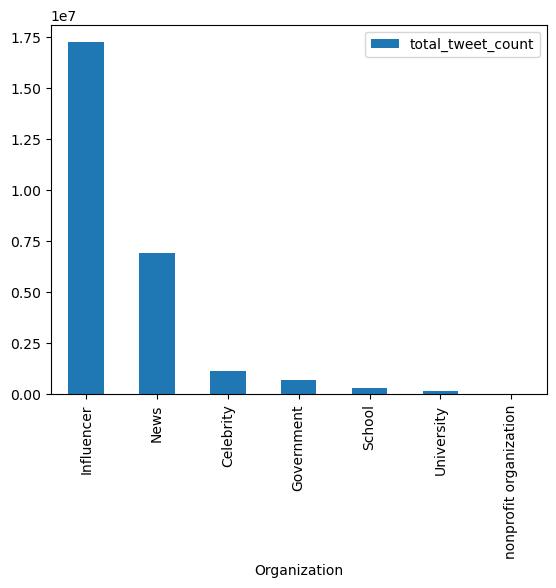

In [37]:
import matplotlib.pyplot as plt

pd_organization_count.plot(kind='bar', x='Organization', y='total_tweet_count')
plt.show()